In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import data_preprocessing.ABC_priors_and_functions as ABC
import warnings
warnings.filterwarnings("ignore")
import data_preprocessing.plotting_functions as ABC_plot

SMALL_SIZE = 15
MEDIUM_SIZE = 21
BIGGER_SIZE = 21

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

This file computes ABC posteriors for selected models.

In [3]:
############Three population#############

#pulse
three_population_pulse_sums = np.load("./data_preprocessing/simulated_ABC_data/three_population_model/three_population_pulse_sums.npy")
three_population_pulse_params = np.load("./data_preprocessing/simulated_ABC_data/three_population_model/three_population_pulse_params.npy")

#chase
three_population_chase_sums = np.load("./data_preprocessing/simulated_ABC_data/three_population_model/three_population_chase_sums.npy")
three_population_chase_params = np.load("./data_preprocessing/simulated_ABC_data/three_population_model/three_population_chase_params.npy")

###########Two population################

#pulse
two_population_pulse_sums = np.load("./data_preprocessing/simulated_ABC_data/two_population_model/two_population_pulse_sums.npy")
two_population_pulse_params = np.load("./data_preprocessing/simulated_ABC_data/two_population_model/two_population_pulse_params.npy")

#final chase parameters
two_population_chase_sums = np.load("./data_preprocessing/simulated_ABC_data/two_population_model/two_population_chase_sums.npy")
two_population_chase_params = np.load("./data_preprocessing/simulated_ABC_data/two_population_model/two_population_chase_params.npy")

############Two population variants###############

#Preliminary two population (pulse)
preliminary_two_population_pulse_sums = np.load("./data_preprocessing/simulated_ABC_data/two_population_model/preliminary/preliminary_two_population_pulse_sums.npy")
preliminary_two_population_pulse_params = np.load("./data_preprocessing/simulated_ABC_data/two_population_model/preliminary/preliminary_two_population_pulse_params.npy")

#Variable p two population (chase)
variablep_two_population_chase_sums = np.load("./data_preprocessing/simulated_ABC_data/two_population_model/variable_p/two_population_chase_variablep_sums.npy")
variablep_two_population_chase_params  = np.load("./data_preprocessing/simulated_ABC_data/two_population_model/variable_p/two_population_chase_variablep_params.npy")

############One population###################

#pulse
one_population_pulse_sums = np.load("./data_preprocessing/simulated_ABC_data/one_population_model/one_population_pulse_sums.npy")
one_population_pulse_params = np.load("./data_preprocessing/simulated_ABC_data/one_population_model/one_population_pulse_params.npy")

One vs Preliminary Two vs Two vs Three Population Model for Pulse Data

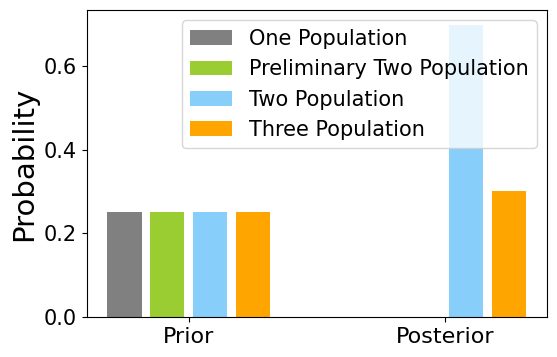

In [4]:
pulse_params = np.concatenate([np.ones(len(one_population_pulse_params)), 2*np.ones(len(preliminary_two_population_pulse_params)), 3*np.ones(len(two_population_pulse_params)), 4*np.ones(len(three_population_pulse_params))], axis = 0)
pulse_sums = np.concatenate([one_population_pulse_sums, preliminary_two_population_pulse_sums, two_population_pulse_sums, three_population_pulse_sums], axis = 0)

proportion_accepted = 500/(500000*4)
accepted_pulse_params, bandwidth = ABC.ABC_reject(pulse_sums, pulse_params, proportion_accepted, inference_portion="pulse")

names = np.array(["One Population", "Preliminary Two Population", "Two Population", "Three Population"])
colors = ["grey", "yellowgreen", "lightskyblue", "orange"]
ABC_plot.model_probabilities(pulse_params, accepted_pulse_params, names, colors)

Two vs Three Population Model for Chase Data

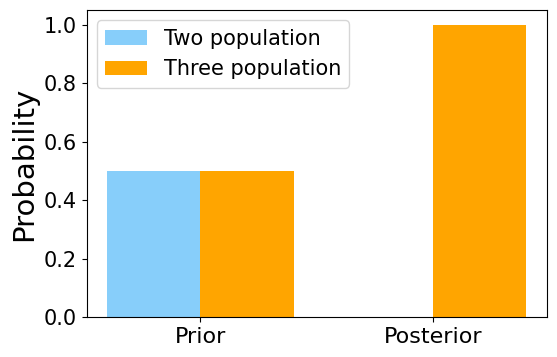

In [5]:
chase_params = np.concatenate([np.ones(len(two_population_chase_params)), 2*np.ones(len(three_population_chase_params))], axis = 0)
chase_sums = np.concatenate([two_population_chase_sums, three_population_chase_sums], axis = 0)

proportion_accepted = 500/(500000*2)
accepted_chase_params, bandwidth = ABC.ABC_reject(chase_sums, chase_params, proportion_accepted, inference_portion="chase")

names = np.array(["Two population", "Three population"])
colors = ["lightskyblue", "orange"]
ABC_plot.model_probabilities(chase_params, accepted_chase_params, names,colors)

Two vs Variable p Two vs Three Population Model for Chase Data

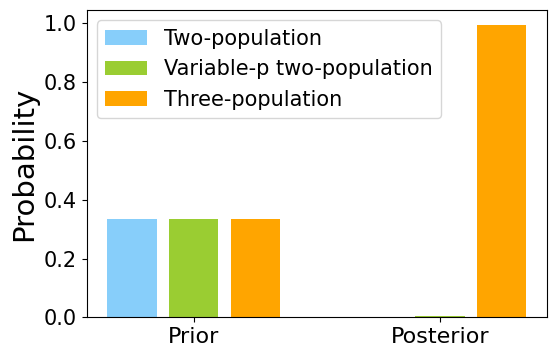

In [6]:
chase_params = np.concatenate([np.ones(len(two_population_chase_params)), 2*np.ones(len(variablep_two_population_chase_params)), 3*np.ones(len(three_population_chase_params))], axis = 0)
chase_sums = np.concatenate([two_population_chase_sums, variablep_two_population_chase_sums, three_population_chase_sums], axis = 0)

proportion_accepted = 500/(500000*3)
accepted_chase_params, bandwidth = ABC.ABC_reject(chase_sums, chase_params, proportion_accepted, inference_portion="chase")

names = np.array(["Two-population", "Variable-p two-population", "Three-population"])
colors = ["lightskyblue", "yellowgreen", "orange"]
ABC_plot.model_probabilities(chase_params, accepted_chase_params, names, colors)